<a href="https://colab.research.google.com/github/dennismathewjose/Data-Mining-IE7275/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

Through this homework, you'll practice the basics of data cleaning, data partition, data normalization, and data visualization.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start.

Alternative solutions are totally welcomed.

## Part 1: Data cleaning and pre-processing

### Problem 1 ##

Glass Identification Data

Source: https://archive.ics.uci.edu/ml/datasets/glass+identification

Creator: B. German

    Central Research Establishment

    Home Office Forensic Science Service

    Aldermaston, Reading, Berkshire RG7 4PN

Donor: Vina Spiehler, Ph.D., DABFT

    Diagnostic Products Corporation

In [ ]:
!pip install --upgrade openpyxl

In [2]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Glass_Identification_Data.xlsx")
df.head()

Saving Glass_Identification_Data.xlsx to Glass_Identification_Data.xlsx


,ID,RI,Na,Mg,Al,Si,K,CA,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,NaN,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.0,1


**TODO1:**
*   Count the the **percentage** of null/missing values for each variable
*   Drop the variables which have more than 75% missing values *(Avoid manual intervention. Code should work even if the attribute/data changes)*

In [ ]:
#Calculating the percentage of each variable
missing_value = df.isnull().sum()
missing_value_percentage = (missing_value / len(df) ) * 100
missing_value_percentage

,0
ID,0.000000
RI,0.934579
Na,0.934579
Mg,7.943925
Al,0.000000
Si,0.467290
K,2.336449
CA,0.000000
Ba,78.037383
Fe,0.000000


In [ ]:
#find the columns whose missing_percentage_values are > 75%
columns_to_drop = missing_value_percentage[missing_value_percentage.values > 75].index

#created a new cleaned dataFrame after droping those columns
df_cleaned = df.drop(columns = columns_to_drop)

#print the head of the cleaned data
df_cleaned.head()

,ID,RI,Na,Mg,Al,Si,K,CA,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


**Hint:**

[Handle missing data in Python](https://machinelearningmastery.com/handle-missing-data-python/)

[dropna() thresh option](https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php)

Note: You can try other methods as well apart from the ones mentioned in the hint


**TODO2:**
*    If a variable contains more than 10 missing records, impute the records by using the mean value of records from the respective class instead of using the mean value of the entire column. *(Avoid manual intervention. Code should work even if the attribute/data changes)*
*   If a variable contains less than 10 missing records, impute the records with the previous non-NAN value from a row with the same 'Class' *(Avoid manual intervention. Code should work even if the attribute/data changes)*
* [What is imputation in Data Mining?](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

In [ ]:
#find the number of missing values in each column after cleaning the dataset
missing_value = df_cleaned.isnull().sum()

#print the values
missing_value


,0
ID,0
RI,2
Na,2
Mg,17
Al,0
Si,1
K,5
CA,0
Fe,0
Class,0


#### Analysis
- Here Variable Mg has 17 missing records which is to be imputed by mean value from the respective class.
- Variables RI, Na, Si and K have lesser number of missing records, hence those can be imputed by previous non-NAN value from a row with the same class.

In [ ]:
#Imputing of values based on the given conditon

#Step 1: defining a funtion
def impute_missing_data(df):

  #Step 2: iterate through each column
  for column in df.columns:

    #Step 3: skip the column 'Class', since we are imputing values based on this column
    if column == 'Class':
      continue

    #Step 4: find the missing count of each column
    missing_count = df[column].isnull().sum()

    #Step 5: if the missing_count is > 10, impute the mean of that particular class
    if missing_count > 10:
      df[column] = df.groupby('Class')[column].transform(lambda x : x.fillna(x.mean()))

    #Step 6: if the missing_count is < 10, impute those records with previous non null values of same class
    elif 0 < missing_count <= 10:
      df[column] = df.groupby('Class')[column].transform(lambda x : x.fillna(method = 'ffill'))

  #Step 7: Return the processed dataFrame
  return df

df_imputed = impute_missing_data(df_cleaned)

**Hint:** Consider using one or a combinition of [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html), and [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compete this task

**TODO3:** Check if all the missing values are handled

In [ ]:
#View the dataFrame after handling the missing values
missing_after_impute = df_imputed.isnull().sum()
missing_after_impute

,0
ID,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
CA,0
Fe,0
Class,0


**Hint:** If you have done all the above mentioned steps properly, you shouldnt be getting NAN values

**TODO4:** Get the descriptive statistics of the predictors for each class and present the information in a table/matrix format

Also, what will you do if your data has non-numerical columns. How will you generate the summary for all columns of a DataFrame regardless of data type?

In [ ]:
#Descriptive statistics of each varibale in a table/Matrix format
df_imputed.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,214.0,107.500000,61.920648,1.00000,54.25000,107.50000,160.750000,214.00000
RI,214.0,1.518376,0.003032,1.51115,1.51655,1.51768,1.519157,1.53393
Na,214.0,13.421495,0.816412,10.73000,12.93000,13.30500,13.860000,17.38000
Mg,214.0,2.883174,1.247328,0.00000,2.73000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.19000,1.36000,1.630000,3.50000
Si,214.0,72.652103,0.775808,69.81000,72.28000,72.79000,73.087500,75.41000
K,214.0,0.502336,0.649717,0.00000,0.13250,0.56000,0.610000,6.21000
CA,214.0,8.956963,1.423153,5.43000,8.24000,8.60000,9.172500,16.19000
Fe,214.0,0.057009,0.097439,0.00000,0.00000,0.00000,0.100000,0.51000
Class,214.0,2.780374,2.103739,1.00000,1.00000,2.00000,3.000000,7.00000


### Question:  What will you do if your data has non-numerical columns. How will you generate the summary for all columns of a DataFrame regardless of data type?

#### Answer


**Hint:** [How to calculate summary statistics with Pandas? ](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

### Problem 2 ##

In [ ]:
#Import the built-in Titanic dataset for this problem
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**TODO1:** What is the mean age of female and male survivors respectively?

**Hint:** Apart from the aforementioned function [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), creating a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) is also a way to go.

**TODO2:** Among all the survivors, what is the gender distribution? (You are expected to present the percentage of each gender in a pivot table.)

**Hint:** The [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) can help with complex aggregation.

**TODO3:** How many children (age <= 12) survived and which class ticket they had?

**Hint:**

[Ways to filter pandas dataframe based on column values](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)

[Using pandas groupby count()](https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/)


**TODO4:** How many first class seated girls (children) DID NOT survive?

**TODO5:** Check whether variable 'survived' and 'alive' are consistent (contains the same information). Is there any other redundant variable existing in this dataset? Drop all the redundant variables and present the updated dataset.

**Hint:**

You might want to encode two variables to 0 and 1 with [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and check if two columns contain the same value.

Or else you can use [Replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

**TODO6:** What other insights can you draw from this dataset? Present one finding through pivot table.

## Part 2: Data Visualization

Before you start: Read the book chapter “Data Visualization”.


**Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.**

### Problem 3

Dataset: Forest fires

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The file forestfires.csv includes data from Cortez and Morais (2007).

Number of instances and attributes are 517 and 13 respectively.  

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the `year`: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [3]:
#Importing libraries and loading the dataset 'forestfires.csv'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("forestfires.csv")
df.head()

Saving forestfires.csv to forestfires.csv


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**TODO1:** Plot a stacked bar chart to show the number of forest fires grouped by months and days of the week. *(Make sure the month are in Months chronological order i.e attribute values are sorted starting with January and ending with December)*

<ipython-input-14-35745b6482fa>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(["month", "day"]).size().unstack(fill_value = 0)


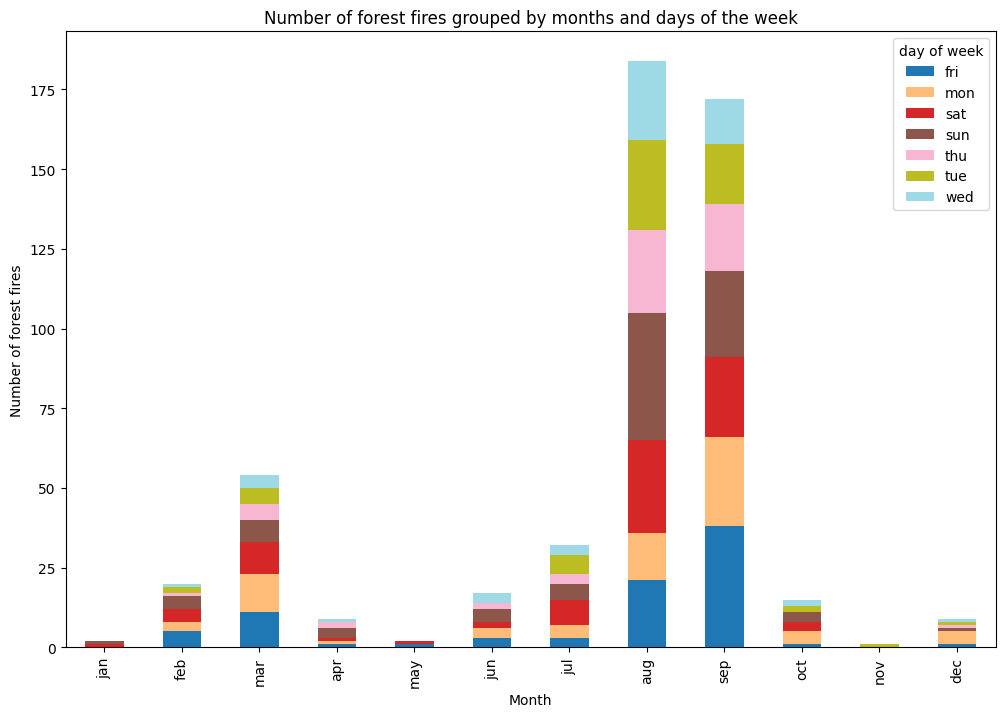

In [14]:
def create_stacked_chart(data):

  #Step 1: Plot the data to a stacked bar chart
  data.plot(kind = "bar", stacked =  True, figsize = (12,8), cmap = "tab20")

  #Step 2: Modification of the graph
  plt.xlabel("Month")
  plt.ylabel("Number of forest fires")
  plt.title("Number of forest fires grouped by months and days of the week")
  plt.legend(title = "day of week")

#Setting the months in chronological order
month_order = ["jan", "feb", "mar", "apr", "may", "jun",
               "jul", "aug", "sep", "oct", "nov", "dec"]

df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True )

#grouping the data by month and day of the week
grouped_data = df.groupby(["month", "day"]).size().unstack(fill_value = 0)

create_stacked_chart(grouped_data)

**Hint:** Before creating the bar chart, use aforementioned data aggregation tools to transform the original dataset to the data frame you need for this section. To be more specific, you need to compute the count of forest fires by months and days before plotting.

Then [build a stacked bar chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

**TODO2 (not graded):** Do you notice any problem with the stacked bar chart? How do you plan to remedy this problem?

**TODO3:** Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and the size of the point indicating the area burnt.

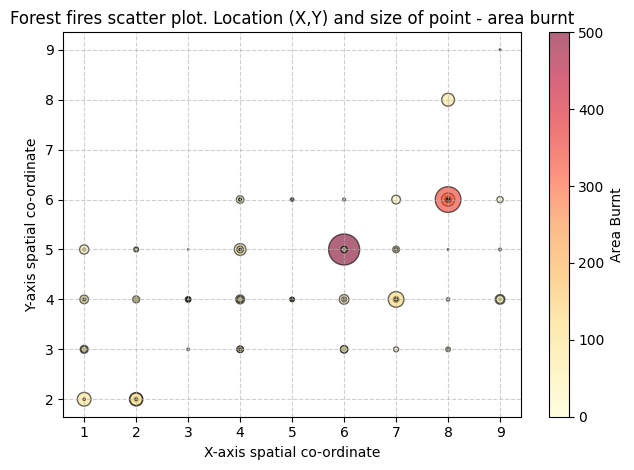

In [50]:
#function definition to make the scatter plot
def plot_location_of_fire(data):

  #Transform the data to define the area burnt
  data['area_normalized'] = data['area']/data['area'].max() * 500

  #plot the scatter plot based on location (X&Y) and size of point by normalized area
  plt.scatter(
      data['X'],
      data['Y'],
      s = data['area_normalized'],
      alpha = 0.6, #alpha denotes the definition of colors of each point -> if there is overlapping then it will be in different transparency
      c = df['area_normalized'],
      cmap = 'YlOrRd',
      edgecolors='black'
  )

  #modify the plot
  plt.xlabel("X-axis spatial co-ordinate",fontsize = 10)
  plt.ylabel("Y-axis spatial co-ordinate", fontsize = 10)
  plt.title("Forest fires scatter plot. Location (X,Y) and size of point - area burnt", fontsize = 12),
  plt.grid(True, linestyle = "--", alpha = 0.6)
  plt.colorbar(label = 'Area Burnt') #higher the intensity => larger the area
  plt.tight_layout()

plot_location_of_fire(df)

**Hint:** [Build a scatter plot with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

**TODO4:** Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the result in terms of correlation among the variables?

**Hint:** [Creat a scatter matrix with Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**TODO5:** Does the wind speed affect the spread of wildfire? Use visualization to back up your answer.

### Problem 4


Dataset: Graduate School Admission

This dataset was created for Graduate Admissions prediction.

The purpose is to help students with shortlisting target universities according to their profiles.

The predicted output gives them a fair idea about their chances of admission for a particular university.

Attribute Information:

Serial.No.: application number: 1 to 500

GRE.Score: GRE score: 290 to 340

TOEFL.Score: TOEFL score: 92 to 120

University.Rating: undergraduate school’s rating: A to E

SOP: Statement of Purpose score: 1 to 5

LOR: Letter of Recommendation score: 1 to 5

CGPA: Undergraduate GPA: 6.8 to 9.92

Research: Research experience: Yes or No

Chance.of.Admit: Chance of getting admitted: 0.34 to 0.97

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Admission_Predict.csv")
df.head()

**TODO1:** Is LOR score related to CGPA? Use visualization to back up your answer.

**Hint:** Use the visualization that is used to compare 2 numerical variables

**TODO2:**
*   Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot.

*   Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.


**TODO3:** Plot a pie chart of University Rating. The pie chart should also present the percentage of each slice. Explain your findings. *(Make sure you show data labels)*

**Hint:** [Build a pie chart with Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Build a pie chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

**TODO4:** What other insights can you draw from this dataset? Present one finding with visualization.